In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [173]:
from pandas.core.frame import DataFrame
df = pd.read_csv('Wine/Rose.csv', usecols=['Name', 'Rating'])
#df = pd.read_csv('Country_quality/uaScoresDataFrame.csv', usecols=['UA_Country', 'Cost of Living'])
df

,Name,Rating
0,Mad Méditerranée Rosé 2019,4.0
1,Redoma Rosé 2019,3.9
2,Fantini Cerasuolo d'Abruzzo 2019,3.6
3,Mount Hermon Rosé 2017,3.4
4,La Villa Rosé 2018,4.6
...,...,...
392,Côte des Roses Rosé 2019,3.9
393,M Rosé 2019,4.0
394,Whispering Angel Rosé 2019,4.2
395,Vinho Verde Rosé N.V.,3.5


In [174]:
#Tìm missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")
#--------------------------------------
df.replace('NaN', np.nan)
df.replace('unknown', np.nan)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop_duplicates()
df.head(18)


No missing value found


,Name,Rating
0,Mad Méditerranée Rosé 2019,4.0
1,Redoma Rosé 2019,3.9
2,Fantini Cerasuolo d'Abruzzo 2019,3.6
3,Mount Hermon Rosé 2017,3.4
4,La Villa Rosé 2018,4.6
5,La Rosé de Manincor 2019,4.1
6,Mea Rosa 2019,3.9
7,Amethystos Rosé 2013,3.8
8,Cinsault 2019,3.6
9,Rosé 2019,3.5


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    397 non-null    object 
 1   Rating  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [176]:
df.describe()

,Rating
count,397.000000
mean,3.741310
std,0.273042
min,2.700000
25%,3.600000
50%,3.700000
75%,3.900000
max,4.800000


In [177]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
Name = df['Name']
Rating = df['Rating']

#Name = df['UA_Country']
#Rating = df['Cost of Living']



print('Số loại rượu:', Name.nunique())
print('Số đánh giá:', rating.nunique())
print('Số cạnh:', len(df))

Số loại rượu: 337
Số đánh giá: 24
Số cạnh: 397


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    397 non-null    object 
 1   Rating  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [179]:
for index, row in df.iterrows():
  B.add_edge(row['Name'], row['Rating'], weight = 1)
B.add_nodes_from(Name, bipartite = 0)
B.add_nodes_from(Rating, bipartite = 1)

<Figure size 864x864 with 0 Axes>

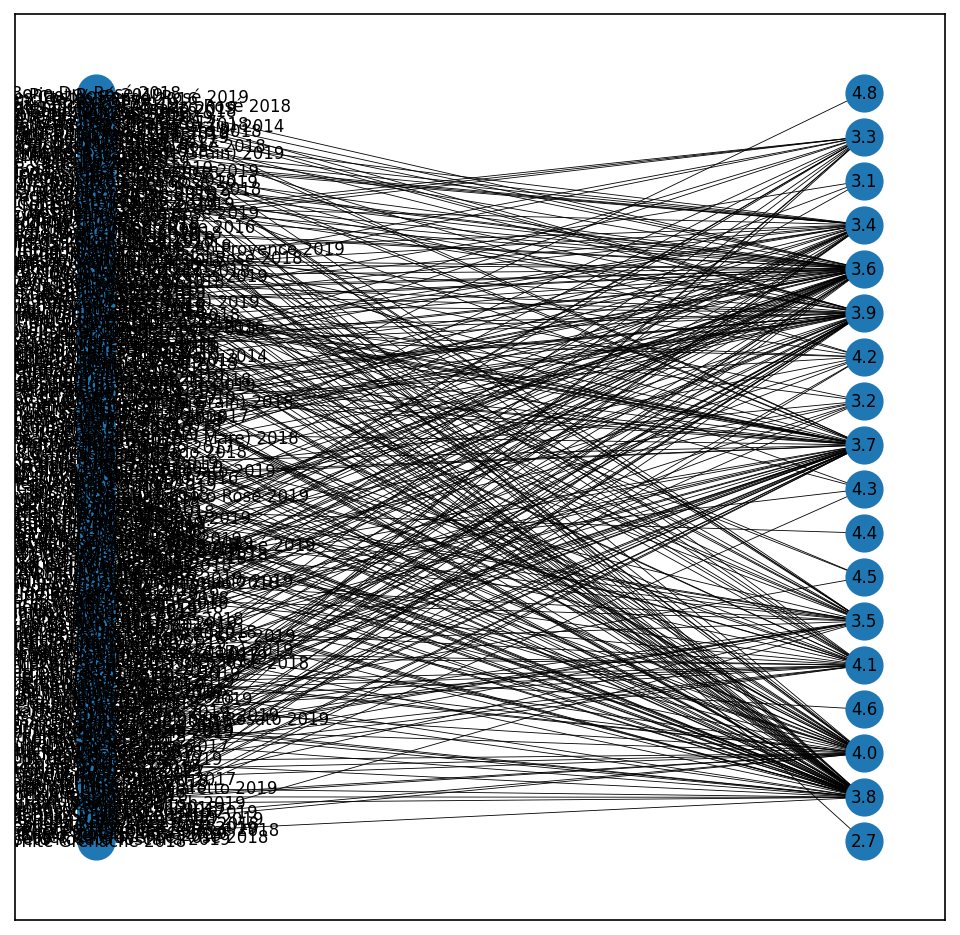

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Name), font_size=8, width=0.4)

In [182]:
G = bipartite.weighted_projected_graph(B, Name)
plt.figure(figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, nodelist=Name, node_size=150, node_color='red')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(Name, Name))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')
plt.title("Graph Name")

plt.show()

NetworkXAlgorithmError: the size of the nodes to project onto (397) is >= the graph size (355).
They are either not a valid bipartite partition or contain duplicates

In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'myCountrydata10Nodes.csv', index = False, header = True)

C:\Users\kakac\AppData\Local\Temp\ipykernel_17676\1284414775.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17676\1284414775.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17676\1284414775.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
C:\Users\kakac\AppData\Local\Temp\ipykernel_17676\1284414775.py:4: FutureWarning: The frame.append method is deprecated a

In [ ]:
print('Do do closeness')
c_dict = nx.closeness_centrality(graph)
print(c_dict)


Do do closeness
{0: 0.0, 58: 0.005769674590353104, 132: 0.0016155088852988692, 603: 0.11277344634091138, 398: 0.010904684975767368, 555: 0.06737015776991029, 1: 0.0, 265: 0.11056222379471023, 611: 0.1570274636510501, 2: 0.0, 182: 0.030921849757673668, 345: 0.06849282523995058, 3: 0.0, 608: 0.061389337641357025, 377: 0.01328543491199728, 40: 0.0016155088852988692, 352: 0.11763688590626675, 450: 0.05977859426899414, 484: 0.009231479344564966, 299: 0.01117009000692361, 65: 0.0032310177705977385, 185: 0.004846526655896607, 228: 0.0016155088852988692, 557: 0.0, 227: 0.02611221573257114, 90: 0.02309741081954329, 151: 0.03802781209414299, 394: 0.0016155088852988692, 4: 0.0, 287: 0.0016155088852988692, 254: 0.024261481652434806, 336: 0.03719379512709768, 5: 0.0, 503: 0.0016155088852988692, 6: 0.0, 429: 0.0016155088852988692, 163: 0.0032310177705977385, 486: 0.009112479806138933, 478: 0.011136699549719865, 518: 0.07237479806138934, 7: 0.0, 293: 0.015439124687913055, 305: 0.0032310177705977385, 

In [ ]:
print('Do do page rank')
pagerank= nx.pagerank(graph)
print (pagerank)

Do do page rank
{0: 0.0007009869165937575, 58: 0.0008992487555956117, 132: 0.0008201840931580853, 603: 0.011940280589799285, 398: 0.0016685319358118419, 555: 0.008365111289468569, 1: 0.0007009869165937575, 265: 0.012629172578447494, 611: 0.01775588813929558, 2: 0.0007009869165937575, 182: 0.0015200008136489306, 345: 0.0015540550042888854, 3: 0.0007009869165937575, 608: 0.005753943488506081, 377: 0.003234241081160118, 40: 0.0007605855048759214, 352: 0.008511284733953168, 450: 0.0023359795814302457, 484: 0.001064228859090721, 299: 0.0027872664662635656, 65: 0.000879782681440249, 185: 0.0010044504559011058, 228: 0.0007605855048759214, 557: 0.0007009869165937575, 227: 0.0012179434399661369, 90: 0.0010574289792340012, 151: 0.0013477813831070569, 394: 0.0008201840931580853, 4: 0.0007009869165937575, 287: 0.0008499833872991671, 254: 0.0014436668187889467, 336: 0.0022484378963755955, 5: 0.0007009869165937575, 503: 0.001296972799415396, 6: 0.0007009869165937575, 429: 0.0008201840931580853, 163: